In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns #load all the needed libraries

Read the dataset

In [2]:
df = pd.read_csv('bank-full.csv', delimiter=';', dtype = {'job':str}) #read the dataset
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
df.rename(columns={'y': 'term_deposit'}, inplace=True) # change the name of the variable

In [4]:
df.info() # show all data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   age           45211 non-null  int64 
 1   job           45211 non-null  object
 2   marital       45211 non-null  object
 3   education     45211 non-null  object
 4   default       45211 non-null  object
 5   balance       45211 non-null  int64 
 6   housing       45211 non-null  object
 7   loan          45211 non-null  object
 8   contact       45211 non-null  object
 9   day           45211 non-null  int64 
 10  month         45211 non-null  object
 11  duration      45211 non-null  int64 
 12  campaign      45211 non-null  int64 
 13  pdays         45211 non-null  int64 
 14  previous      45211 non-null  int64 
 15  poutcome      45211 non-null  object
 16  term_deposit  45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
df.nunique() # check unique value

age               77
job               12
marital            3
education          4
default            2
balance         7168
housing            2
loan               2
contact            3
day               31
month             12
duration        1573
campaign          48
pdays            559
previous          41
poutcome           4
term_deposit       2
dtype: int64

Find the number of unknown in each column

In [6]:
unknown_counts = {} # count all the "unknown" value


for column in df.columns:
   
    if df[column].dtype == 'object':
        
        count_unknown = df[column].apply(lambda x: x == 'unknown').sum()
        
        unknown_counts[column] = count_unknown


for column, count in unknown_counts.items():
    print(f"Occurrences of 'unknown' in {column}: {count}")

Occurrences of 'unknown' in job: 288
Occurrences of 'unknown' in marital: 0
Occurrences of 'unknown' in education: 1857
Occurrences of 'unknown' in default: 0
Occurrences of 'unknown' in housing: 0
Occurrences of 'unknown' in loan: 0
Occurrences of 'unknown' in contact: 13020
Occurrences of 'unknown' in month: 0
Occurrences of 'unknown' in poutcome: 36959
Occurrences of 'unknown' in term_deposit: 0


Data reduction

In [7]:
columns_to_select = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'balance', 'day', 'month', 'duration', 'campaign', 'previous', 'term_deposit']

df_new = df.loc[:, columns_to_select]

Cancel all the unknown value in the selected dataframe

In [8]:
df_new = df_new[~df_new.apply(lambda row: row.astype(str).str.contains('unknown').any(), axis=1)] # remove all the row that contain "unknown" 

Replace yes and no by 1 and 0

In [9]:
binary_mapping = {'yes': 1, 'no': 0} # turn all the "yes" and "no" value into "0" and "1"

for column in df_new.columns:
    if set(df_new[column]).issubset(['yes', 'no']):
        df_new[column] = df_new[column].map(binary_mapping)


df_new.head()

,age,job,marital,education,default,housing,loan,balance,day,month,duration,campaign,previous,term_deposit
0,58,management,married,tertiary,0,1,0,2143,5,may,261,1,0,0
1,44,technician,single,secondary,0,1,0,29,5,may,151,1,0,0
2,33,entrepreneur,married,secondary,0,1,1,2,5,may,76,1,0,0
5,35,management,married,tertiary,0,1,0,231,5,may,139,1,0,0
6,28,management,single,tertiary,0,1,1,447,5,may,217,1,0,0


Change the data type

In [10]:
df_new['date'] = df_new['month'] + ' ' + df_new['day'].astype(str) # combine the "day" and "month" into "date"

df_new.drop(['month', 'day'], axis=1, inplace=True)

df_new.head()

,age,job,marital,education,default,housing,loan,balance,duration,campaign,previous,term_deposit,date
0,58,management,married,tertiary,0,1,0,2143,261,1,0,0,may 5
1,44,technician,single,secondary,0,1,0,29,151,1,0,0,may 5
2,33,entrepreneur,married,secondary,0,1,1,2,76,1,0,0,may 5
5,35,management,married,tertiary,0,1,0,231,139,1,0,0,may 5
6,28,management,single,tertiary,0,1,1,447,217,1,0,0,may 5


In [11]:
df_new.info() # check the new data type

<class 'pandas.core.frame.DataFrame'>
Index: 43193 entries, 0 to 45210
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   age           43193 non-null  int64 
 1   job           43193 non-null  object
 2   marital       43193 non-null  object
 3   education     43193 non-null  object
 4   default       43193 non-null  int64 
 5   housing       43193 non-null  int64 
 6   loan          43193 non-null  int64 
 7   balance       43193 non-null  int64 
 8   duration      43193 non-null  int64 
 9   campaign      43193 non-null  int64 
 10  previous      43193 non-null  int64 
 11  term_deposit  43193 non-null  int64 
 12  date          43193 non-null  object
dtypes: int64(9), object(4)
memory usage: 4.6+ MB


In [12]:
new_file_name = 'cleaned_bank.csv'

df_new.to_csv(new_file_name, index=False) #save to a new csv file


EDA

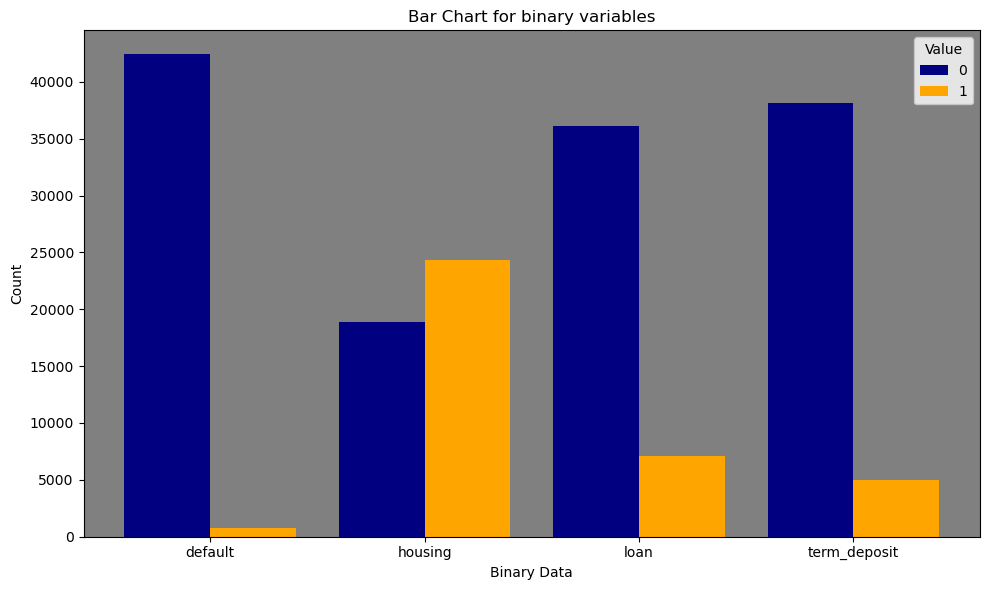

In [13]:
selected_columns = ['default', 'housing', 'loan', 'term_deposit'] #create a bar chart

selected_df = df_new[selected_columns]

fig, ax = plt.subplots(figsize=(10, 6))

# Set bar width
bar_width = 0.4

# Set positions for bars
positions = range(len(selected_columns))

# Plot each value separately
for i, col in enumerate(selected_df.columns):
    zeros = selected_df[col].value_counts().get(0, 0)
    ones = selected_df[col].value_counts().get(1, 0)
    ax.bar(positions[i] - bar_width/2, zeros, bar_width, color='navy', label='0' if i == 0 else '', align='center')
    ax.bar(positions[i] + bar_width/2, ones, bar_width, color='orange', label='1' if i == 0 else '', align='center')

# Set labels and title
plt.xticks(positions, selected_columns)
plt.xlabel('Binary Data')
plt.ylabel('Count')
plt.title('Bar Chart for binary variables')
plt.legend(title='Value')
plt.tight_layout()
plt.savefig('graph1.png', dpi=1000)

ax.set_facecolor('grey')
# Show plot
plt.show()

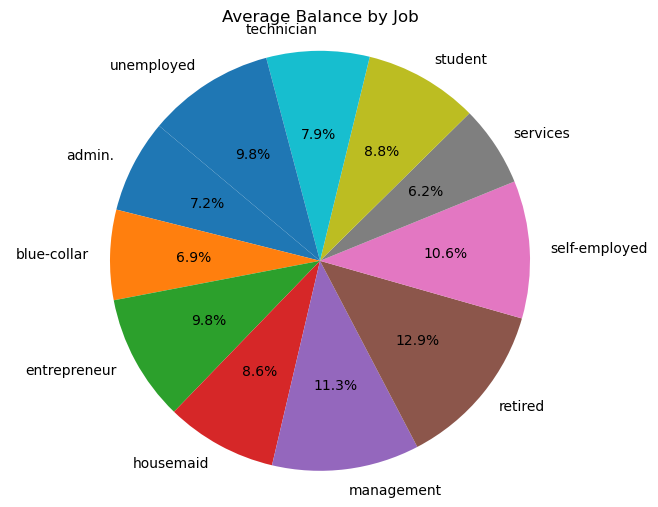

In [14]:
average_balance = df_new.groupby('job')['balance'].mean().reset_index() # create a pie chart

# Create pie chart
plt.figure(figsize=(8, 6))
plt.pie(average_balance['balance'], labels=average_balance['job'], autopct='%1.1f%%', startangle=140)
plt.title('Average Balance by Job')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.savefig('graph2.png', dpi=1000)
plt.show()

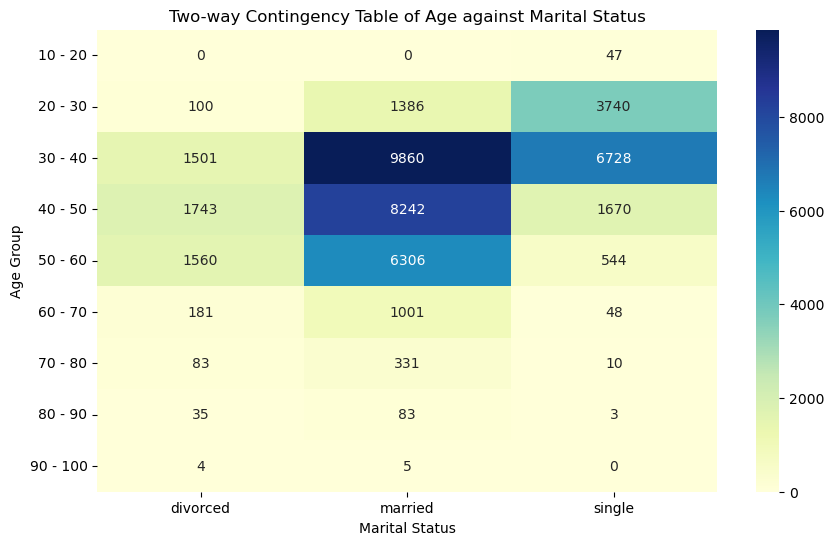

In [15]:
bins = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100] # create a two-way contingency table
labels = [f'{i} - {i+10}' for i in range(10, 100, 10)]
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Create Two-way Contingency Table
contingency_table = pd.crosstab(df['age_group'], df['marital'])

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table, annot=True, cmap="YlGnBu", fmt="d")

# Adding labels and title
plt.title('Two-way Contingency Table of Age against Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Age Group')
plt.savefig('graph3.png', dpi=1000)
plt.show()